In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps = pd.read_csv('googleplaystore.csv')

In [3]:
apps = apps.dropna()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [4]:
apps = apps[apps['Size'] != 'Varies with device'] # remove 1637 rows

## Explore Dataset

In [5]:
# apps.describe()
# apps['Category'].unique()
# apps.info()
# apps.shape

# Select features and target

In [6]:
# features = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Last Updated']

features = ['Reviews', 'Size', 'Installs', 'Price']

In [7]:
y = apps['Rating']
X = apps[features]

## Format Columns

In [8]:
## TODO Later if needed
def parse_date(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace(',', '')
    return obj_str
    # mon_day_year = obj_str.split()

# all size in megabytes
def format_size(obj):
    obj_str = str(obj)
    if 'M' in obj_str:
        obj_str = obj_str.replace('M', '')
        return float(obj_str)
    obj_str = obj_str.replace('k', '')
    return float(obj_str) / 1000

def format_installs(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('+', '')
    obj_str = obj_str.replace(',', '')
    return int(obj_str)

def format_price(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('$', '')
    return float(obj_str)

In [9]:
pd.options.mode.chained_assignment = None
X['Reviews'] = pd.to_numeric(X['Reviews'])
X['Size'] = X['Size'].apply(format_size)
X['Installs'] = X['Installs'].apply(format_installs)
X['Price'] = X['Price'].apply(format_price)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   7723 non-null   int64  
 1   Size      7723 non-null   float64
 2   Installs  7723 non-null   int64  
 3   Price     7723 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 301.7 KB


In [11]:
# sns.countplot(x='Category', data=X, palette="mako_r")
# plt.rcParams["figure.figsize"] = (30,5)
# plt.xticks(rotation=45) 
# plt.show()

In [12]:
# X[X['App'].str.contains('Be Like Bro - Compilation')]

In [13]:
X.describe()

,Reviews,Size,Installs,Price
count,7.723000e+03,7723.000000,7.723000e+03,7723.000000
mean,2.948983e+05,22.970456,8.424070e+06,1.128169
std,1.863933e+06,23.449629,5.015742e+07,17.408036
min,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,1.075000e+02,5.300000,1.000000e+04,0.000000
50%,2.332000e+03,14.000000,1.000000e+05,0.000000
75%,3.905300e+04,33.000000,1.000000e+06,0.000000
max,4.489389e+07,100.000000,1.000000e+09,400.000000


In [14]:
X.Price.unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

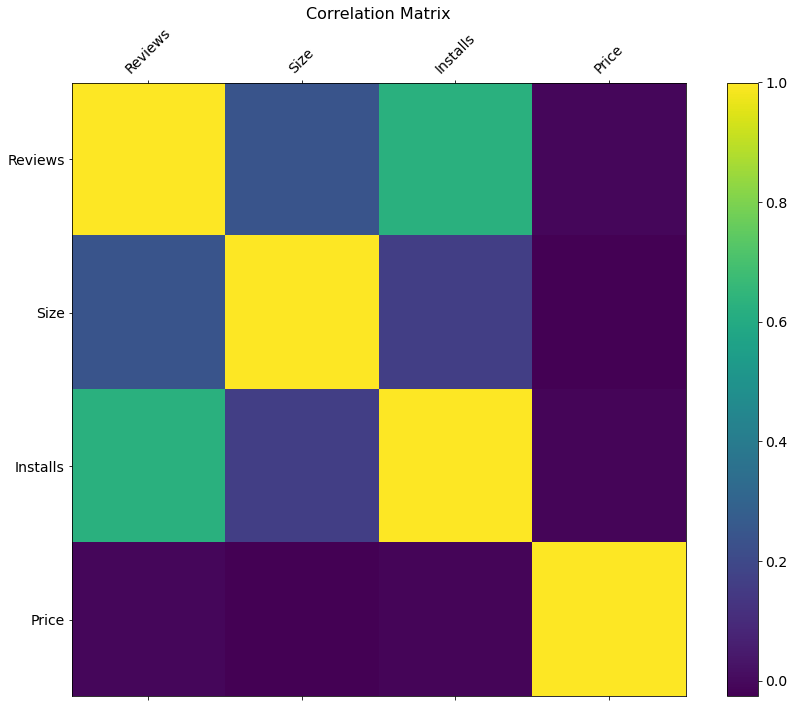

In [15]:
f = plt.figure(figsize=(15, 11))
plt.matshow(X.corr(), fignum=f.number)

plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [16]:
X.corr()

,Reviews,Size,Installs,Price
Reviews,1.000000,0.240382,0.626187,-0.010184
Size,0.240382,1.000000,0.162707,-0.026272
Installs,0.626187,0.162707,1.000000,-0.010852
Price,-0.010184,-0.026272,-0.010852,1.000000


In [17]:
y.shape

(7723,)

In [18]:
X.shape

(7723, 4)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   7723 non-null   int64  
 1   Size      7723 non-null   float64
 2   Installs  7723 non-null   int64  
 3   Price     7723 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 301.7 KB


In [26]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in [10, 12, 14, 16, 18, 20]}
best_tree_size = min(scores, key=scores.get)

In [27]:
best_tree_size

12

In [28]:
scores

{10: 0.36097622673077834,
 12: 0.360149108964809,
 14: 0.36159258554974544,
 16: 0.36222752920095,
 18: 0.3608914254549385,
 20: 0.36074548129035117}

In [29]:
# Define model
app_model = DecisionTreeRegressor(max_leaf_nodes=12, random_state = 1)
# Fit model
app_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = app_model.predict(val_X)

mean_absolute_error(val_y, val_predictions)

0.36014910896480884

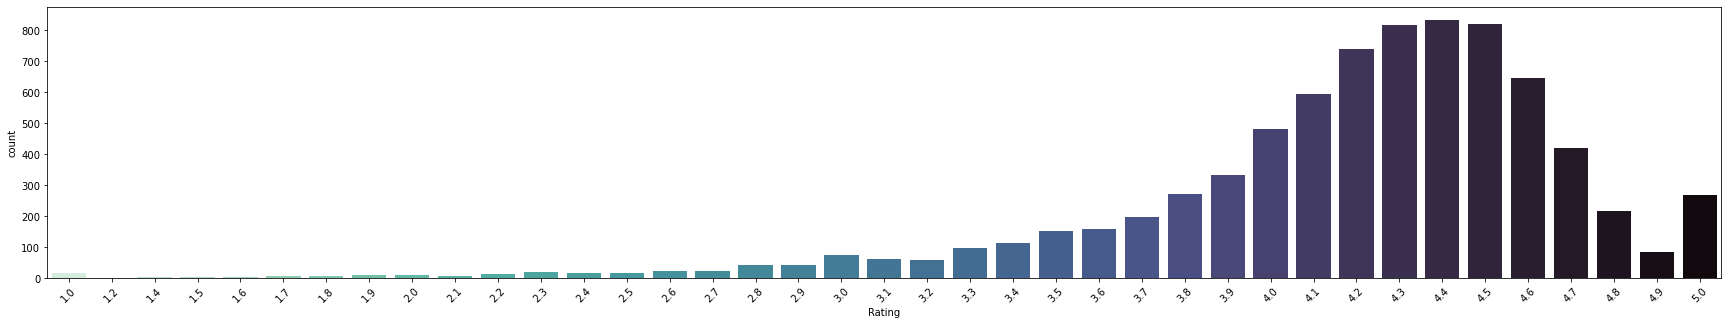

In [32]:
sns.countplot(x='Rating', data=apps, palette="mako_r")
plt.rcParams["figure.figsize"] = (30,5)
plt.xticks(rotation=45) 
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
app_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, app_preds))

0.35821681339547734
